<div>
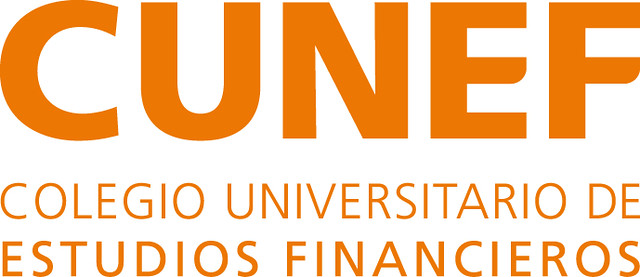
</div>

## Máster en Data Science para finanzas
### Práctica proyecto de Machine Learning

####  __Autores__: 
####  - González Díaz, Guillermo
  
####  - Sebastiani, Carlos

#### __Enlaces a GIT__ :
    -
    -
    

#### __Nuestros datos__ :


##### Nos enfrentamos a la base de datos de accidentes de tráfico ocurridos en Canadá entre los años 1999 y 2014, del informe "_Canadian Motor Vehicle Traffic Collision Statistics_", elaborada en cooperación con el gobierno de Canadá.

##### Esta tabla está compuesta de  5,860,405 filas y 22 columnas. Cada fila representa una persona involucrada en un accidente de tráfico.

#### __Objetivos del trabajo__: 

#### El objetivo del trabajo será crear un modelo de Machine Learning que, habiendo una persona implicada en un accidente, calcule la probabilidad de que al menos haya una víctima mortal en dicho accidente.

#### __Diccionario de datos__:
#### Todas las columnas incluyen valores como QQ, UU, XX, NN, UUUU, o XXXX. Las Us hacen referencia a desconocidos. Las X, a datos que no han sido aportados por la jurisdicción y las N a elementos no aplicables.

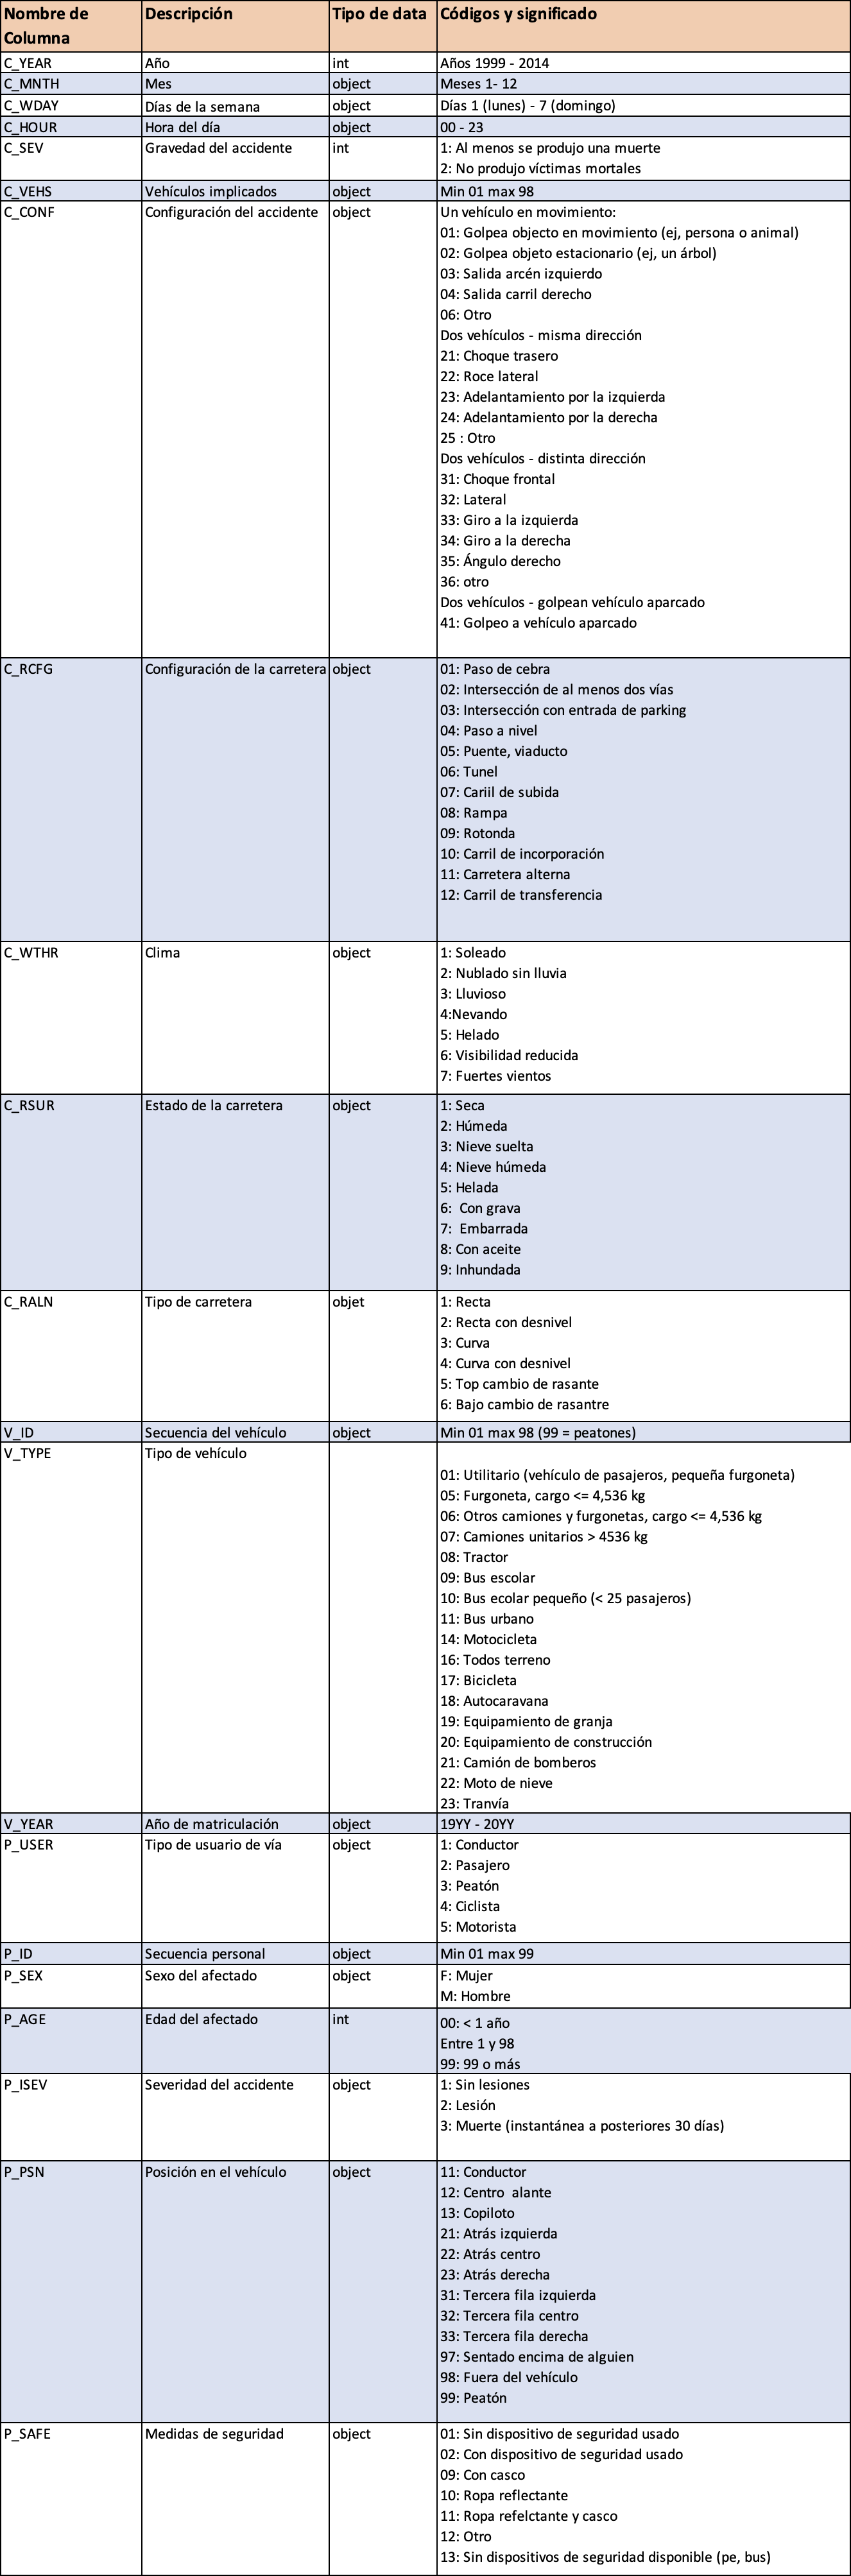

# EDA:

Librerias necesitadas:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as ss
from my_functions import acc_mortal, get_radian, plot_hours

In [2]:
import warnings
warnings.filterwarnings("ignore")

Cargamos nuestros datos :


In [3]:
data = pd.read_csv('../datos/NCDB_1999_to_2014.csv')

In [4]:
data.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
dtype: object

In [5]:
# convertimos a minúsculas
data.columns= data.columns.str.lower()

In [6]:
# creamos un df auxuliar para no modificar el original.
df = data

In [7]:
df.head()

,c_year,c_mnth,c_wday,c_hour,c_sev,c_vehs,c_conf,c_rcfg,c_wthr,c_rsur,...,v_id,v_type,v_year,p_id,p_sex,p_age,p_psn,p_isev,p_safe,p_user
0,1999,1,1,20,2,02,34,UU,1,5,...,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,...,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,...,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,...,99,NN,NNNN,01,M,05,99,2,UU,3


In [8]:
# Primero definimos una nueva columna: accidente mortal, que tomará 1s o 0s.
df['acc_mortal'] = df['c_sev'] == 1
df["acc_mortal"] = df["acc_mortal"].astype(int)
df.acc_mortal.sum()

98633

In [8]:
# Hay columnas que, en el momento del accidente, son desconocidas. Las eliminamos.
df = df.drop(['p_id', 'p_isev', 'v_id'], axis = 1)

Visualizamos el número de accidentes mortales/no mortales así como sus porcentajes:

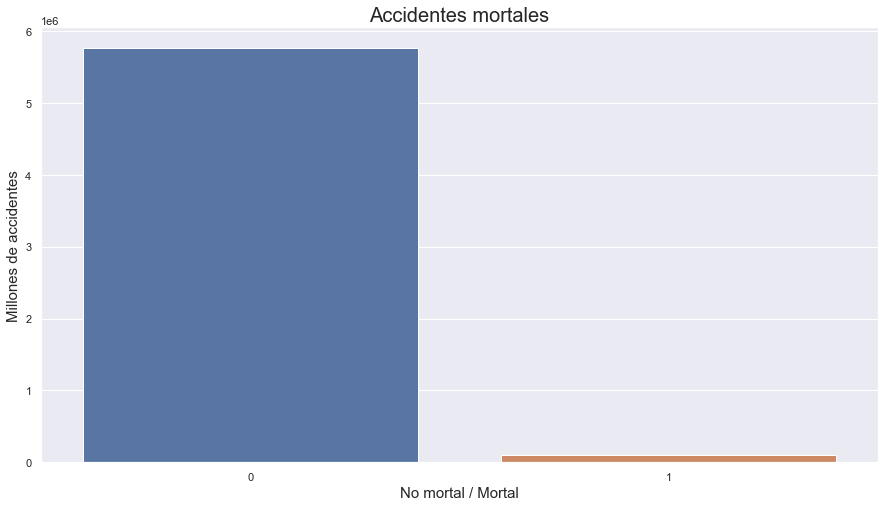

In [68]:
# Graficamos Accidentes / Accidentes que provocaron víctimas mortales
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(df['acc_mortal'])

# Customización
plt.title("Accidentes mortales", fontsize = 20)
plt.ylabel("Millones de accidentes", fontsize = 15)
plt.xlabel("No mortal / Mortal", fontsize = 15)

plt.show();

In [69]:
# Cuántas personas estuvieron implicadas en accidentes mortales (1)
df_sev= pd.DataFrame(df['c_sev'].value_counts()).rename(columns={'index':'Severity', 'Severity':'Cases'})
df_sev.head()

,c_sev
2,5761772
1,98633


In [70]:
# Probabilidad de que habiendo un accidente se produzca al menos una víctima mortal es:
df['c_sev'].value_counts() * 100/len(df)

2    98.316959
1     1.683041
Name: c_sev, dtype: float64

# Workflow: 
## 1. Evolución en el tiempo 
## 2. Día de la semana
## 3. Hora del día
## 4. Edad y día de la semana
## 5. Carretera
## 6. Sexo y tipo de vehículo
## 7. Configuración del accidente
## 8. Condiciones climatológicas
## 9. Medidas de seguridad utilizadas
## 10. Número total de fallecidos en el período, sexo y períodos vacacionales.

## 1. Evolución en el tiempo:


### Conclusiones

1. El número de accidentes total tanto como los accidentes mortales se han reducido en el tiempo, pasando de 7,500 en el año 1999 a 4,500 en el 2014.
2. En estos casi 20 años, la mortalidad por accidente se ha reducido de un 1,83 % a un 1,51 
%.


In [9]:
anual= acc_mortal(df, 'c_year', 'acc_mortal')
anual

,c_year,accidentes,acc_mortal,pct_mortales,acc_ponderado,muertes_ponderado
0,1999,413509,7598,1.837445,7.055980,7.703304
1,2000,422075,7011,1.661079,7.202147,7.108169
2,2001,409389,6718,1.640982,6.985678,6.811108
3,2002,420008,7144,1.700920,7.166877,7.243012
4,2003,407036,6870,1.687811,6.945527,6.965214
5,2004,389050,6926,1.780234,6.638620,7.021991
6,2005,386470,6980,1.806091,6.594595,7.076739
7,2006,378523,6889,1.819969,6.458990,6.984478
8,2007,368507,6768,1.836600,6.288081,6.861801
9,2008,338268,5796,1.713434,5.772093,5.876329


Text(0.5, 0, '')

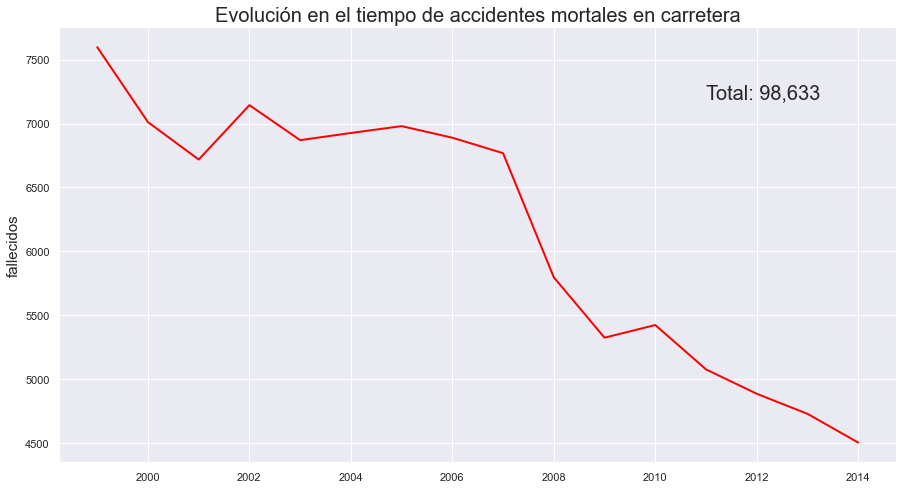

In [72]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(15,8)})
sns.set(style = "darkgrid")
sns.lineplot(x = 'c_year', y = 'acc_mortal', data = anual,
             color = 'red',
            linewidth = 2)

# Customización:
plt.title("Evolución en el tiempo de accidentes mortales en carretera", fontsize = 20)
plt.ylabel("fallecidos", fontsize = 15) 
plt.text(2011, 7200, 'Total: 98,633' , fontsize = 20)
plt.xlabel("") 

## 2. Día de la semana:
### Conclusiones:
1. El día de la semana con mayor número de personas involucradas en accidentes es el viernes, que representa un total del 17 % de los accidentes.
2. La mayor mortalidad se da los fines de semana, viernes, sábados y domingos. Especialmente el sábado, que se lleva un 18.1 % de los accidentes mortales.
3. Respecto al número de accidentes, es bastante similar durante todos los días de la semana, aunque como ya hemos dicho, con mayor tasa de mortalidad los fines de semana.
4. El número de desconocidos es mínimo, encontrándonos solo con 13 accidentes mortales. Por este motivo, nos tomamos la libertad de imputar esos valores desconocidos por domingos, ya que la diferencia no será significativa.

In [73]:
# modificamos para efectos de la visualización:
df['c_wday'] = df['c_wday'].astype(str)
df['c_wday'] = df['c_wday'].replace(['U'], '7')

In [74]:
dia = acc_mortal(df, 'c_wday', 'acc_mortal')
dia

,c_wday,accidentes,acc_mortal,pct_mortales,acc_ponderado,muertes_ponderado
0,1,776012,11975,1.543146,13.241610,12.140967
1,2,816265,11653,1.427600,13.928474,11.814504
2,3,825560,11740,1.422065,14.087081,11.902710
3,4,869653,13438,1.545214,14.839469,13.624243
4,5,999725,16543,1.654755,17.058975,16.772277
5,6,867188,17859,2.059415,14.797407,18.106516
6,7,706002,15425,2.184838,12.046983,15.638782


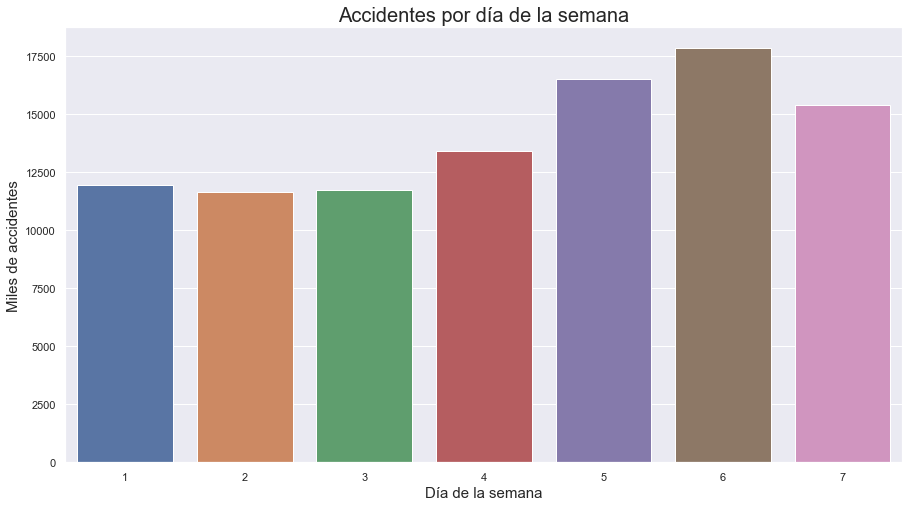

In [75]:
sns.barplot(x='c_wday', y = 'acc_mortal' , data= dia)
plt.title('Accidentes por día de la semana', fontsize = 20)
plt.ylabel('Miles de accidentes', fontsize = 15)
plt.xlabel('Día de la semana', fontsize = 15);

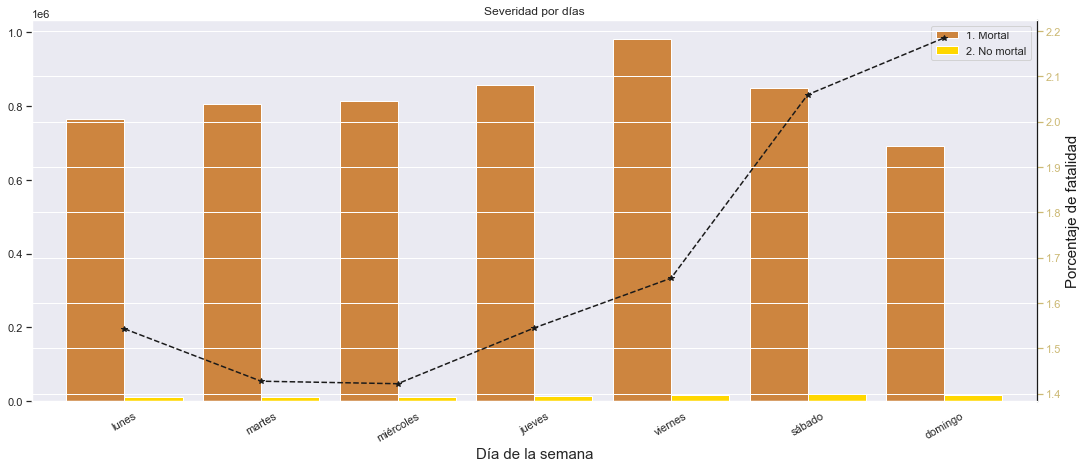

In [76]:
dias = ['lunes','martes', 'miércoles', 'jueves', 'viernes','sábado', 'domingo']
df_diario = df.groupby(['c_wday', 'acc_mortal']).size().unstack()

# Definimos nuestro gráfico
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylabel('Porcentaje de fatalidad', fontsize = 15)
ax2.spines['right'].set_color('k')
ax2.yaxis.label.set_color('k')
ax2.tick_params(axis='y',colors='y')

# Dibujamos el gráfico:
df_diario.plot(kind='bar', rot= 30,
               log= False, color=['peru','gold'],
               figsize=(18, 7), width = 0.85,
               title= 'Severidad por días', ax= ax1)
ax1.grid(axis= 'both')
ax1.legend(['1. Mortal','2. No mortal'])
ax1.set_xticklabels(dias)
ax1.set_xlabel('Día de la semana', fontsize = 15)

# Porcentajes fatalidad
per = df_diario[1] / (df_diario[1] + df_diario[0]) * 100
per.plot(c='k', style='*--', ax=ax2)
plt.xticks(np.arange(0,7), dias); 

## 3. Hora del día:

### Conclusiones: 
1. Analizando los accidentes por hora hemos visto que el mayor número de accidentes se dan a _entre las 3 y las 5 de la tarde_. Solo en estas tres horas del día se han dado el 25 % de accidentes.

2. Si hablamos de muertes en términos globales, en el gráfico de abajo veremos que la mayoría de víctimas mortales se producen entre las horas comprendidas entre las 15 y las 18 de la tarde, lo que es lógico teniendo en cuenta el punto anterior.

3. Analizando en general el hecho de que se porduzca un accidente con víctimas mortales, es igualmente más elevado entre las 15 y las 18 en términos globales. Sin embargo, en términos de porcentajes, vemos que son mucho más letales los accidentes que se producen en la madrugada a partir de las 00 y hasta las 6, donde la tasa de mortalidad se dispara hasta alcanzar máximos del 4.2 %. 
4. Entre las 00 y las 5 de la mañana, pese a que el porcentaje de accidentes es bajo, esas horas se llevan más del 24 % de accidentes mortales, lo cual es llamativo viendo la cantidad de accidentes que se dan a una hora y a otra. En los gráficos circulares de abajo queda bastante clara esta idea.

Text(0.5, 0, 'Hora del día (24h)')

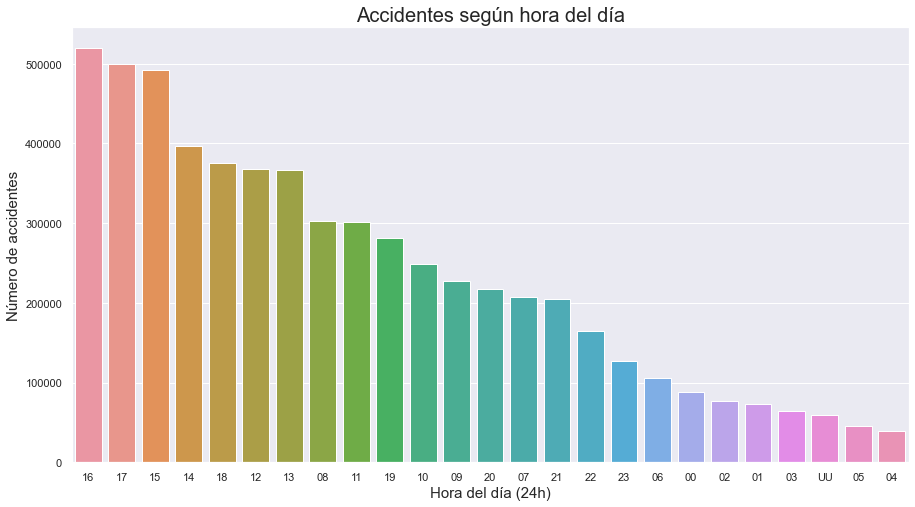

In [77]:
# número total de accidentes dependiendo de la hora del día
sns.countplot(x='c_hour' , data= data, order=data['c_hour'].value_counts().index)
plt.title('Accidentes según hora del día', fontsize= 20)
plt.ylabel('Número de accidentes', fontsize = 15)
plt.xlabel('Hora del día (24h)', fontsize= 15)

In [10]:
horas = acc_mortal(df, 'c_hour', 'acc_mortal')
horas

,c_hour,accidentes,acc_mortal,pct_mortales,acc_ponderado,muertes_ponderado
0,00,88481,2970,3.356653,1.509810,3.011163
1,01,73383,2978,4.058161,1.252183,3.019273
2,02,77500,3171,4.091613,1.322434,3.214948
3,03,64036,2613,4.080517,1.092689,2.649215
4,04,39817,1720,4.319763,0.679424,1.743838
5,05,44952,1900,4.226731,0.767046,1.926333
6,06,106086,2593,2.444243,1.810216,2.628938
7,07,207965,3359,1.615176,3.548646,3.405554
8,08,302834,3574,1.180185,5.167459,3.623534
9,09,227626,3588,1.576270,3.884134,3.637728


In [11]:
# Qué porcentaje de accidentes mortales se dan cuando la tasa de mortalidad se duplica
# Vemos que un 24 % de accidentes mortales se dan entre las 00 y 5 de la madrugada. 
tasa_alta = horas[horas['pct_mortales'] > 3 ]
print(tasa_alta['c_hour'])
print('Porcentaje de muertes entre las horas más mortales: ',
      tasa_alta['pct_mortales'].sum().round(), '%')

0    00
1    01
2    02
3    03
4    04
5    05
Name: c_hour, dtype: object
Porcentaje de muertes entre las horas más mortales:  24.0 %


In [12]:
# para la visualización, quitamos valores UU, que no representan ni siquiera un 1 % de la 
# muestra:
horas = horas.drop(24, axis=0)

<Figure size 432x432 with 0 Axes>

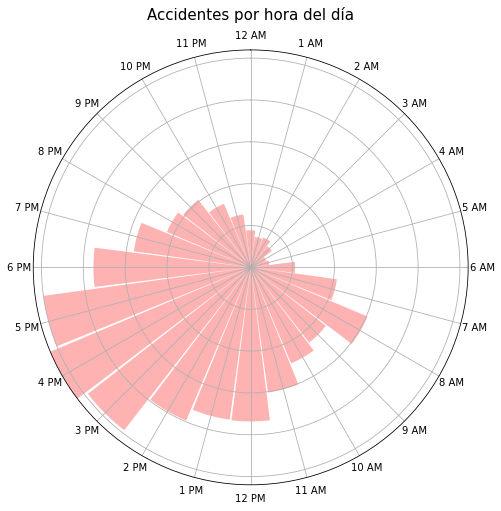

<Figure size 432x432 with 0 Axes>

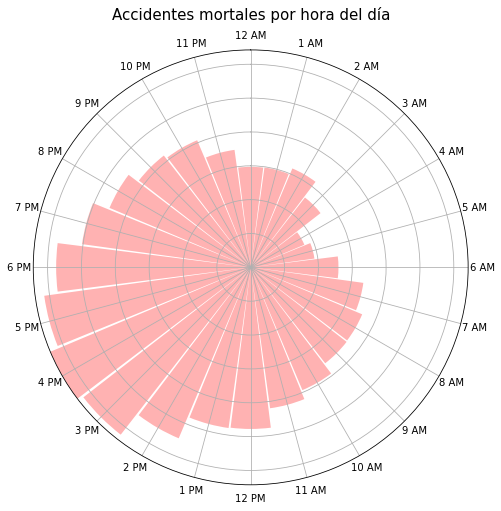

<Figure size 432x432 with 0 Axes>

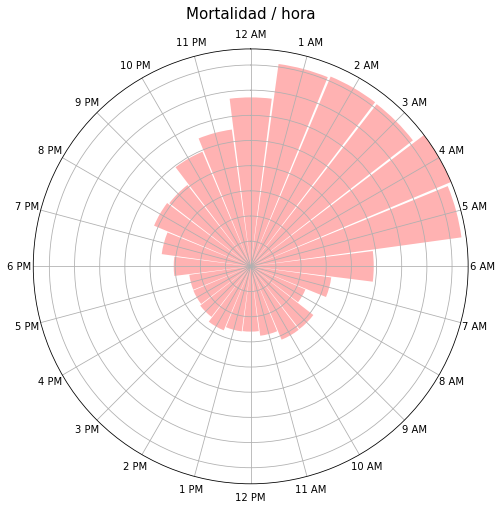

In [13]:
# Número total de accidentes
fig = plt.figure(figsize=(6,6))
plot_hours(horas, 'c_hour', 'accidentes',
                        'Accidentes por hora del día')
# Accidentes que resultaron mortales:
fig = plt.figure(figsize=(6,6))
plot_hours(horas, 'c_hour', 'acc_mortal',
                        'Accidentes mortales por hora del día')
# Mortalidad/hora
fig = plt.figure(figsize=(6,6))
plot_hours(horas, 'c_hour', 'pct_mortales',
                        'Mortalidad / hora')

## 4. Edad y día de la semana:
#### Conclusiones:
1. En la gran mayoría de accidentes están involucradas personas entre 22 y 56 años, que suponen el primer y tercer cuantil del boxplot dibujado aquí abajo. La mediana de personas involucradas en accidentes mortales vemos que está en torno a los 35 años.
2. Existe relación lineal entre edad y número de accidentes y  también entre edad y accidentes mortales, siendo más elevadas en personas jóvenes. Lo cual tiene sentido porque suponen la gran mayoría de la muestra.
3. La mortalidad es mucho más elevada en personas de mayor edad, puesto que hablamos de una parte de la población más vulnerable. Y vemos abajo, que en ocasiones esa mortalidad llega a alcanzar valores del 7 %. 
4. El grupo de edad que supone el mayor número de muertes en porporción es el que va de entre de entre los 16 a los 25 años.  Y la peor edad, los 18. Suponen el 3 % de accidentados con víctimas mortales. Provocado quizás por un exceso de confianza, poca experiencia al volante y al caer mayormente en fines de semana y vísperas, concluimos que el efecto del alcohol será otro factor importante, pero no disponemos de esa información.
5. Combinando todas las representaciones de este apartado, podemos concluir que el grupo de edad con más riesgo es el comprendido entre los 18 y los 40: tanto como por cifras globales como porcentuales, son los que más riesgo presentan y más accidentes mortales. Especialmente en fines de semana y vísperas.

In [30]:
edad = acc_mortal(df, 'p_age', 'acc_mortal')
edad[edad['muertes_ponderado'] > 1.8]

,p_age,accidentes,acc_mortal,pct_mortales,acc_ponderado,muertes_ponderado
15,16,96467,1875,1.943670,1.646081,1.900986
16,17,158163,2715,1.716584,2.698841,2.752628
17,18,171719,3068,1.786640,2.930156,3.110521
18,19,167721,3052,1.819689,2.861935,3.094299
19,20,158747,2847,1.793420,2.708806,2.886458
20,21,147725,2601,1.760704,2.520730,2.637048
21,22,138421,2421,1.749012,2.361970,2.454554
22,23,130566,2174,1.665058,2.227935,2.204130
23,24,122300,2031,1.660670,2.086886,2.059149
24,25,118292,1948,1.646772,2.018495,1.974998


In [31]:
# Imputamos NN y UU por outliers para su representación gráfica
edad['p_age'] = edad['p_age'].replace(['UU'], "110")
edad['p_age'] = edad['p_age'].replace(['NN'], "110")
edad['p_age'] = edad['p_age'].astype(int)

In [32]:
# Convertimos la edad en numérico y le damos a UU un valor extremo. Vemos que hay muchísimos 
# UU, así como muchos UU que son mortales.
df['p_age'] = df['p_age'].replace(['UU'], "110")
df['p_age'] = df['p_age'].replace(['NN'], "110")
df['p_age'] = df['p_age'].astype(int)

Comprobamos que nos encontramos con la mayoría de personas que han provocado accidentes mortales se encuentran en el rango de edad de entre 22 y 56 años. Nos encontramos con mímimos de 1 año hasta máximos de 97 años. Los outliers que nos aparecen son los que hemos imputado a los valores desconocidos. 

Text(0.5, 0, 'Edades')

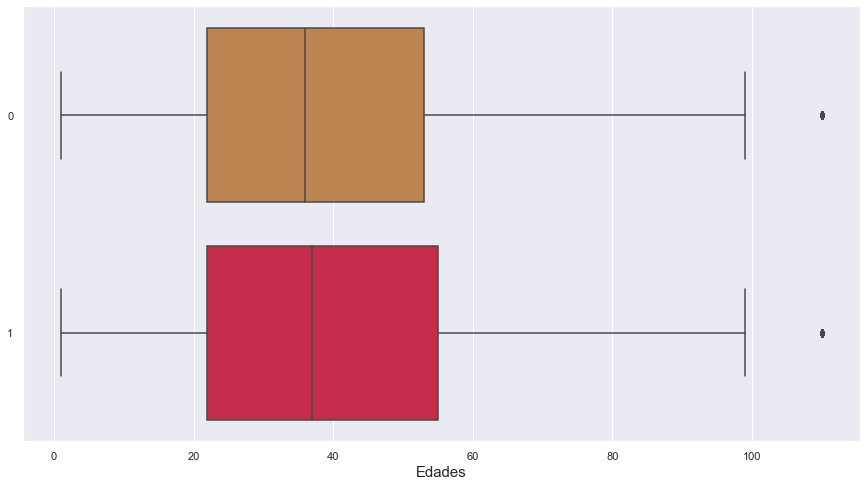

In [33]:
#fig, ax = plt.subplots()
sns.boxplot(x="p_age", y="acc_mortal", data=df, orient="h", palette={1:"crimson", 0:"peru"})
plt.ylabel('')
plt.xlabel('Edades', fontsize = 15)

#### Relación lineal edad: 

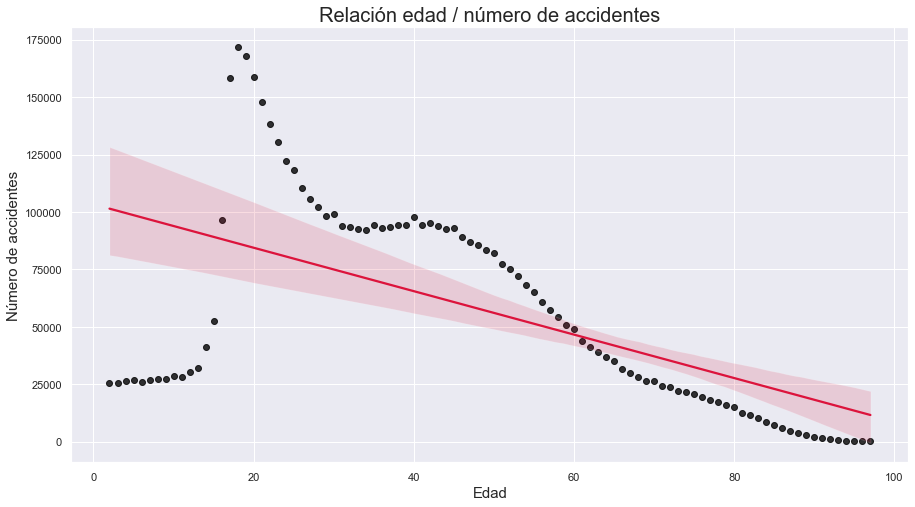

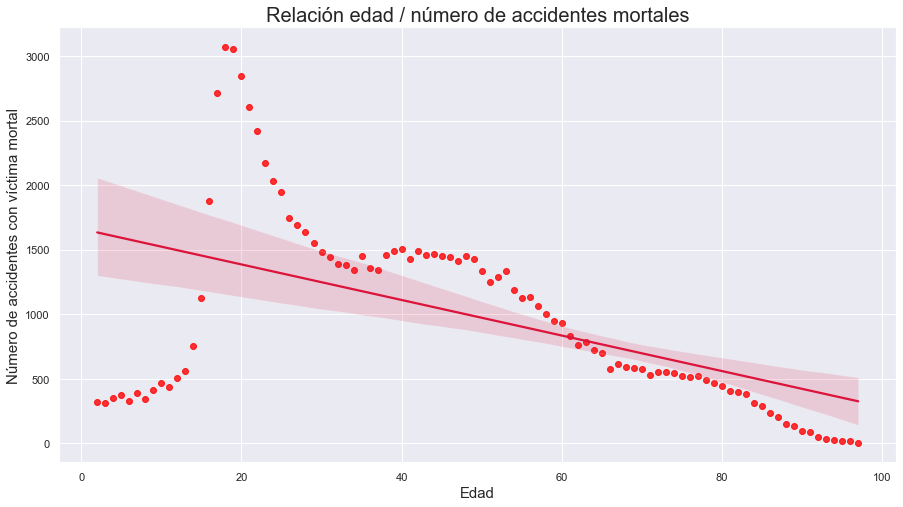

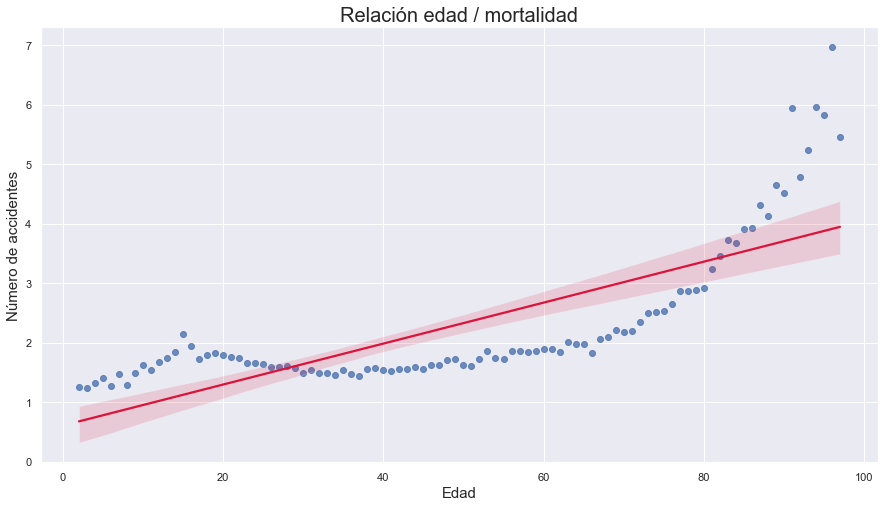

In [34]:
# Número de accidentes totales
sns.regplot(x=edad.p_age[1:97], y=edad.accidentes[1:97] , data=edad, color = 'black',
           line_kws={"color": "crimson"})
plt.title('Relación edad / número de accidentes',  fontsize = 20)
plt.xlabel('Edad', fontsize = 15)
plt.ylabel('Número de accidentes', fontsize = 15)
plt.show()
 
# Accidentes con víctimas mortales
sns.regplot(x=edad.p_age[1:97], y=edad.acc_mortal[1:97] , data=edad, color = 'red',
           line_kws={"color": "crimson"})
plt.title('Relación edad / número de accidentes mortales', fontsize = 20)
plt.xlabel('Edad', fontsize = 15)
plt.ylabel('Número de accidentes con víctima mortal', fontsize = 15)
plt.show()

# Porcentaje de mortalidad según la edad
sns.regplot(x=edad.p_age[1:97], y=edad.pct_mortales[1:97] , data=edad,
           line_kws={"color": "crimson"})
plt.title('Relación edad / mortalidad', fontsize = 20)
plt.ylabel('Número de accidentes', fontsize = 15)
plt.xlabel('Edad', fontsize = 15)
plt.show()

#### Edad y día de la semana:

__Accidentes totales:__

In [35]:
# Número de accidentes en total por día y edad
df_edad_dia = df[['p_age','c_wday']].astype(int).\
groupby(['c_wday','p_age']).size().unstack().T

# Agrupamos las edades para una mejor visualización
bins = list(range(0,115,5))
df_edad_dia['edad'] = pd.cut(df_edad_dia.index,
                             bins = list(range(0,115,5)), 
                             labels= bins[:-1])

df_edad_dia = df_edad_dia.groupby('edad').sum()
df_edad_dia.head()

c_wday,1,2,3,4,5,6,7
edad,,,,,,,
0,18516,19144,19163,20040,23645,23377,19490
5,16850,16662,16826,17817,22334,24750,20702
10,23303,23367,23250,25356,31275,31419,26487
15,93973,95892,97481,104757,132170,125275,103269
20,83179,85850,87310,93615,111819,106360,89171


Representaciones gráficas:
- Vemos que la lista de número de accidentes la encabezan nuevamente jóvenes de entre 18 y 30 años.
- También observamos como, llegado el viernes, todos los grupos de edad suben en cuanto al número de accidetntes.
- Igualmente encabezan el ranking en accidentes mortales estos subgrupos de edad, 

In [36]:
df_edad_dia= df_edad_dia.T.reset_index()
df_edad_dia = df_edad_dia.rename(columns = {'c_wday': 'dia'})

__Accidentes mortales:__

In [37]:
# Repetimos el proceso entero:
df_edad_mort = df[df['acc_mortal']== 1]

df_edad_mort = df_edad_mort[['p_age', 'c_wday']].astype(int).\
groupby(['c_wday', 'p_age']).size().unstack().T

# agrupamos por sexo y contamos repeticiones: unstack para que nos saque df
bins = list(range(0,115,5))
df_edad_mort['edad'] = pd.cut(df_edad_mort.index,
                             bins = list(range(0,115,5)), 
                             labels= bins[:-1])
df_edad_mort = df_edad_mort.groupby('edad').sum()
df_edad_mort = df_edad_mort.T.reset_index()
df_edad_mort = df_edad_mort.rename(columns = {'c_wday': 'dia'})


__Represenatción gráfica:__

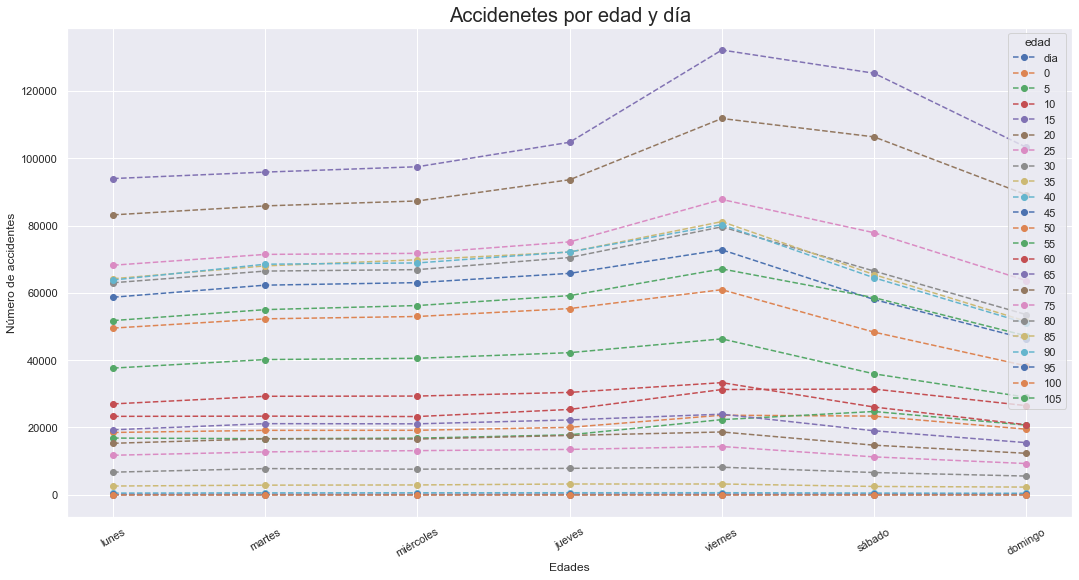

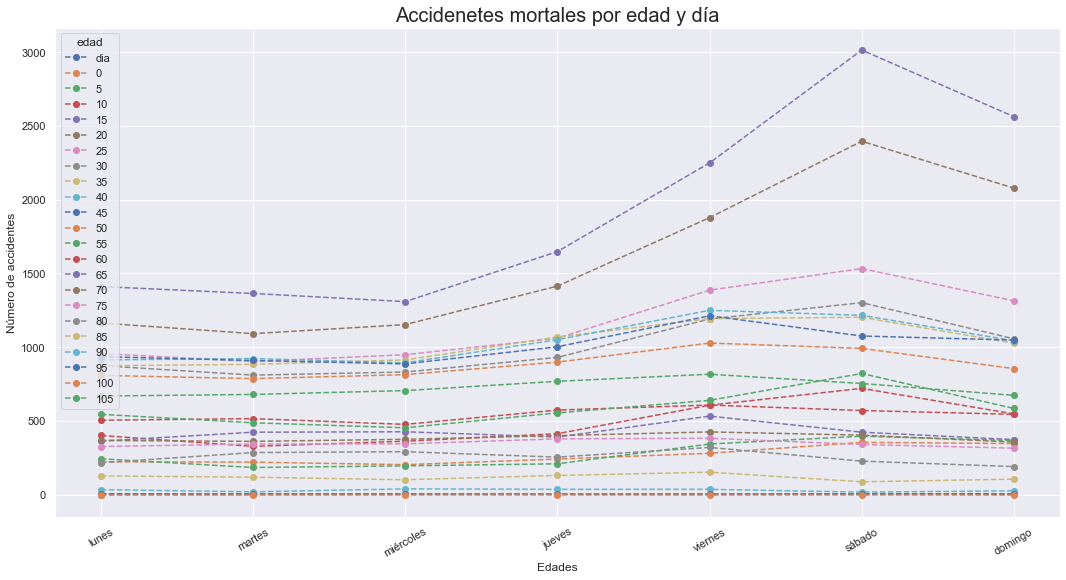

In [38]:
df_edad_dia.plot(figsize=(18,9), rot = 30, style='--o')
plt.title('Accidenetes por edad y día', fontsize = 20)
plt.ylabel('Número de accidentes')
plt.xlabel('Edades')
plt.xticks(range(0,7),['lunes','martes','miércoles','jueves','viernes','sábado','domingo'])
plt.show();

df_edad_mort.plot(figsize=(18,9), rot = 30, style='--o')
plt.title('Accidenetes mortales por edad y día', fontsize = 20)
plt.ylabel('Número de accidentes')
plt.xlabel('Edades')
plt.xticks(range(0,7),['lunes','martes','miércoles','jueves','viernes','sábado','domingo'])
plt.show();

## 5. Tipo de vía
### Conclusiones:

1. A simple vista, es muy llamativo que en "7", lo que equivale a carriles extra que a veces se usan para que los vehículos más lentos, como camiones, no entorpezcan la circulación. Sirven para mejorar la congestión así como la seguridad, pero vemos que son los que presentan mortalidad más elevada. No obstante, en número no son significativos.
2. Vemos que la mayoría de accidentes se reparten entre 1 (non intersection) y 2 (intersection). Entendemos 1 como pasos de cebra y 2 como una intersección de al menos dos vías.
3. Es llamativo que las siguientes categorías, que suman un 10 % del total de accidentes, sean valores desconocidos (QQ y UU)
4. Mirando la gráfica, vemos que representan alta mortalidad, después de lo comentado aquí, los pasos a nivel y los carriles de incorporación de la autopista.

In [39]:
road = acc_mortal(df, 'c_rcfg', 'acc_mortal')
# convertimos qq y uu en 11s y 12s respectivamente, solo para verlo en la tabla:
road['c_rcfg'] = road['c_rcfg'].replace(['QQ'], "11")
road['c_rcfg'] = road['c_rcfg'].replace(['UU'], "12")
road.set_index('c_rcfg')

,accidentes,acc_mortal,pct_mortales,acc_ponderado,muertes_ponderado
c_rcfg,,,,,
01,2079515,57730,2.776128,35.484152,58.530107
02,2746752,26665,0.970783,46.869662,27.034562
03,289184,2654,0.917755,4.934540,2.690783
04,23723,920,3.878093,0.404801,0.932751
05,51196,1162,2.269709,0.873592,1.178105
06,6001,217,3.616064,0.102399,0.220008
07,1009,115,11.397423,0.017217,0.116594
08,11780,81,0.687606,0.201010,0.082123
09,1743,11,0.631096,0.029742,0.011152


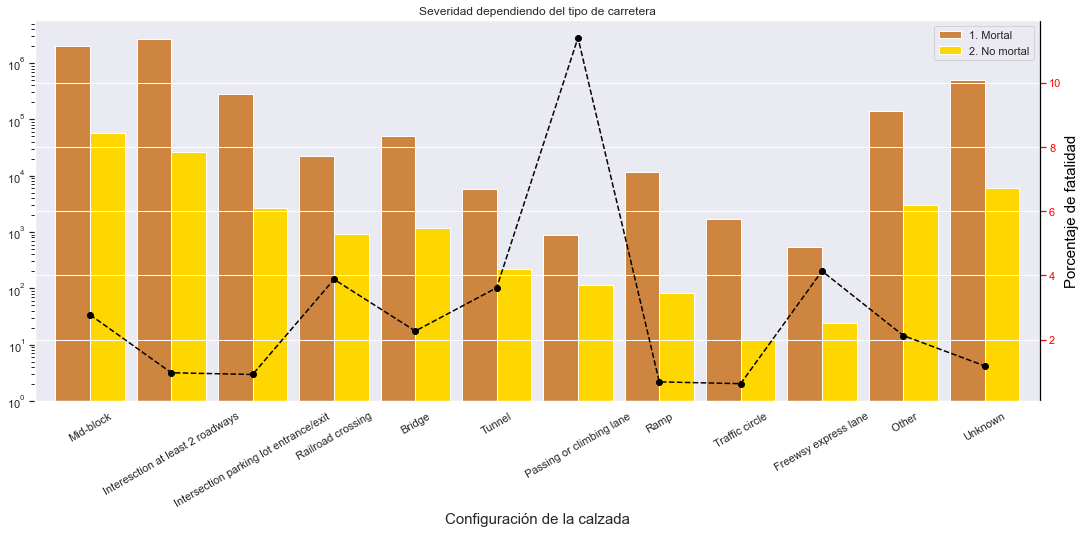

In [40]:
road_type = ['Mid-block','Interesction at least 2 roadways', 
             'Intersection parking lot entrance/exit', 'Railroad crossing', 'Bridge',
             'Tunnel', 'Passing or climbing lane', 'Ramp', 
             'Traffic circle', 'Freewsy express lane',' Other', 'Unknown']

df2 = df.groupby(['c_rcfg','acc_mortal']).size().unstack().fillna(0)

# Definimos nuestro gráfico
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylabel('Porcentaje de fatalidad', fontsize = 15)
ax2.spines['right'].set_color('black')
ax2.yaxis.label.set_color('black')
ax2.tick_params(axis='y',colors='red')

# Dibujamos el gráfico en logaritmos:
df2.plot(kind='bar', rot=30, log=True, 
         color=['peru','gold'], figsize=(18,7), width = 0.85,
         title='Severidad dependiendo del tipo de carretera', ax=ax1)
ax1.grid(axis='both')
ax1.legend(['1. Mortal','2. No mortal'])
ax1.set_xticklabels(road_type)
ax1.set_xlabel('Configuración de la calzada', fontsize = 15)

# Porcentajes fatalidad
se1 = df2[1] / (df2[1] + df2[0])*100
se1.plot(c='black', style='o--', ax=ax2)
plt.xticks(np.arange(0,12),road_type); 

## 6. Sexo y tipo de vehículo:
#### Conclusiones
1. En el 70 % de accidentes mortales están implicados turismos, con un total de 4,827,390 de accidentes sobre el total, y el 83 % de accidentes totales.
2. Los hombres representan el 54 % mientras que las mujeres el 41 % de los implicados en un accidente. El el total, los hombres estuvieron involucrados en 65,055 accidentes mortales mientras que las mujeres en 30,683.
3. Los hombres están involucrados en el 65 % de accidentes que incluyen víctimas mortales.

4. Si miramos el resto de vehículos relevantes, encontramos que en 17, 11, 14, 6, 7 y 8 los afectados por el accidente eran principalmente hombres. Esto son, tractores, camiones, pequeños camiones, y furgonetas, que es el único tipo en el que podemos ver un porcentaje relevante de mujeres afectadas.
5. El único punto en el que hombres y mujeres muestran cifras similares, es en el número de accidentados cuando se trata de peatones, aunque otra vez el hombre presenta mayores tasas de mortalidad.

7. Después nos encontramos con motos (3.7 %) y con ciclistas (1%).
8. Nos encontramos con un 7 % de accidentes mortales de los que nos disponemos información del tipo de vehículo implicado en el accidente. 
9. Analizando los gráficos normalizados se observa que peatones sufren accidentes y muertes en la misma proporción hombres y mujeres. Proporcionalmente, hay muchos más hombres que conducen vehículos tipo: tractores, pequeños camiones, motos... y que accidentes mortales en School buses y fire engines son inexistentes en mujeres.
10. Vemos que los accidentes de las mujeres se encuentran repartidos principalmente entre peatones y vehículos utilitarios. Los accidentes de los hombres están más repartidos entre otro tipo de vehículos, pero utilitarios sigue siendo el más común.
11. Como conclusión final, hemos observado que independientemente del tipo de vehículo y una vez con datos normalizados, que los hombres tienden a presentar mayores tasas de mortalidad en todos los aspectos.

In [41]:
sexo = acc_mortal(df, 'p_sex', 'acc_mortal')
sexo[['accidentes', 'acc_mortal']] = sexo[['accidentes', 'acc_mortal']].astype(int)
sexo.head()

,p_sex,accidentes,acc_mortal,pct_mortales,acc_ponderado,muertes_ponderado
0,F,2440421,30683,1.257283,41.642532,31.108250
1,M,3170244,65055,2.052050,54.095988,65.956627
2,N,14786,283,1.913973,0.252303,0.286922
3,U,234954,2612,1.111707,4.009177,2.648201


In [42]:
# Comparamos accidentes y mortalidad entre hombres y mujeres
sexo[['accidentes', 'acc_mortal']] = sexo[['accidentes', 'acc_mortal']].astype(int)
sexo.set_index('p_sex')
sexo.drop(sexo.index[2:4], inplace=True)

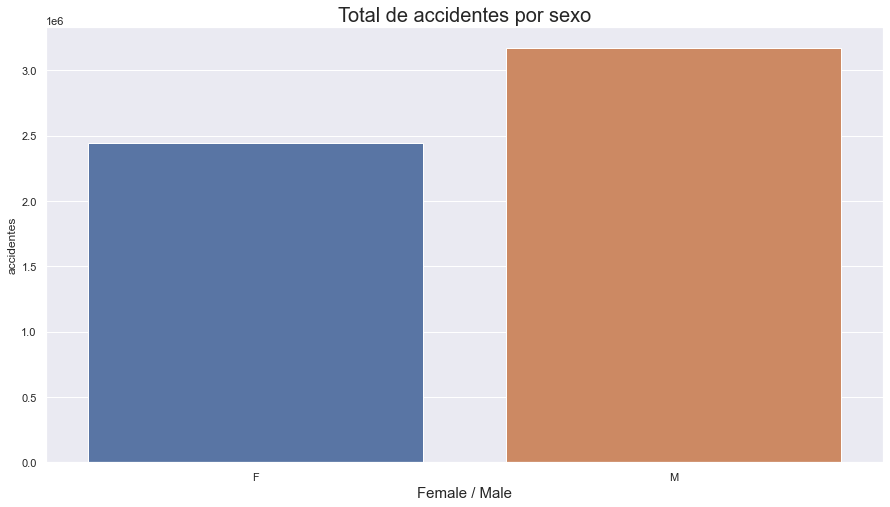

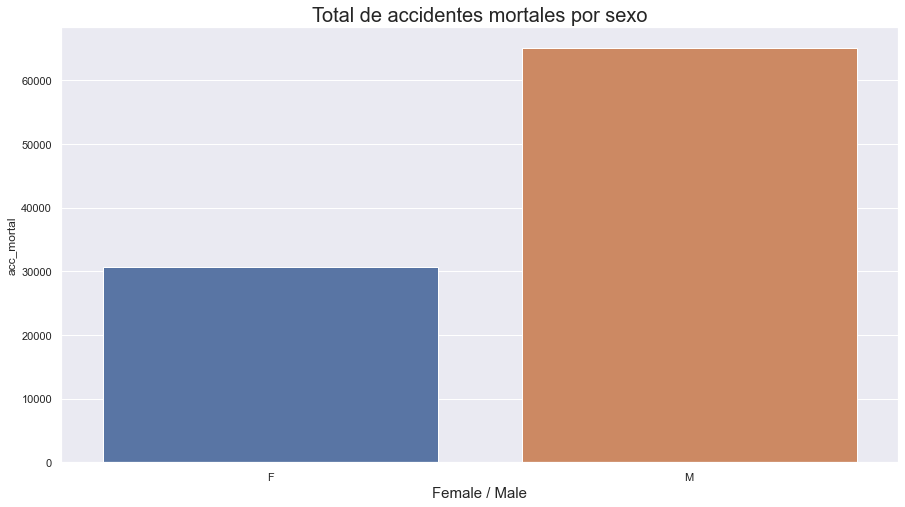

In [43]:
sns.barplot(x= 'p_sex', y = 'accidentes', data= sexo)
plt.title('Total de accidentes por sexo', fontsize = 20)
plt.xlabel('Female / Male', fontsize = 15)
plt.show()
sns.barplot(x= 'p_sex', y = 'acc_mortal', data= sexo)
plt.title('Total de accidentes mortales por sexo', fontsize = 20)
plt.xlabel('Female / Male', fontsize = 15)
plt.show();

In [44]:
pd.DataFrame(df.groupby('v_type').size().sort_index()).rename(columns={0 :'casos'})

,casos
v_type,
01,4827390
05,66106
06,175491
07,88057
08,70556
09,20914
10,906
11,51260
14,122734


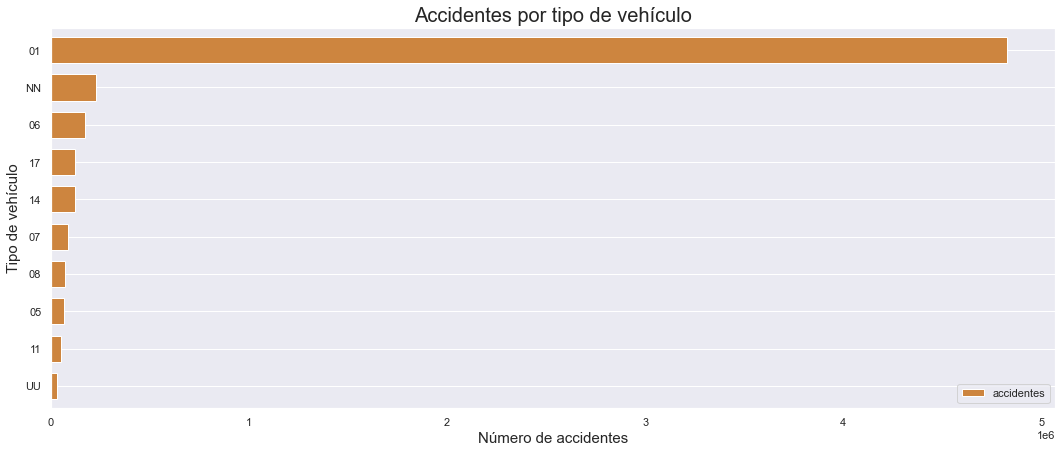

In [45]:
veh = pd.DataFrame(df.groupby('v_type').size().sort_index())
#df3['types'] = v_type
veh = veh.rename(columns={0:'accidentes'}).sort_values(by='accidentes')
# Sacamos el top 10
veh[-10:].plot.barh(log= False, 
                    color= 'peru',
                    figsize=(18, 7), width = 0.7)
plt.title('Accidentes por tipo de vehículo', fontsize = 20)
plt.xlabel('Número de accidentes', fontsize = 15)
plt.ylabel('Tipo de vehículo', fontsize = 15)
plt.grid(axis='x');

#### Sexo y tipo de vehículo:

Total de accidentes dependiendo del vehículo y el sexo:

In [46]:
# Cómo afecta el número de accidentes según el vehículo y sexo:
# Nos quedamos con las columnas que nos interesan:
df_sex = df[['v_type', 'p_sex', 'c_sev']]

# Cambiamos hombres por 0, mujeres por 1:
df_sex.p_sex.replace({'M':'hombre','F':'mujer'},inplace=True)

# agrupamos por sexo y contamos repeticiones: unstack para que nos saque df
df_sex = df_sex[['p_sex','v_type']].groupby(['v_type','p_sex']).size().unstack()

# N  y U eran solamente un 0.25 % y 4 % respectivamente, así que la eliminamos
# con efectos a la representación gráfica:
df_sex = df_sex.drop(['U', 'N'], axis = 1)
df_sex.head()

/Users/guillemrogonzalezdiaz/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


p_sex,hombre,mujer
v_type,,
01,2489508.0,2160256.0
05,44627.0,19525.0
06,116676.0,49234.0
07,74503.0,8477.0
08,63936.0,2432.0


In [47]:
# Comrpobación de que la ejecución se ha realizado correctamente. 
# Vemos que coinciden con nuestra tabla de 'sexo'
print('Accidentes hombres: ', df_sex['hombre'].sum().round())
print('Accidentes mujeres: ', df_sex['mujer'].sum().round())

Accidentes hombres:  3170244.0
Accidentes mujeres:  2440421.0


Total de accidentes __mortales__ dependiendo del sexo y tipo de vehículo:

In [48]:
# Igual que antes, pero añadimos accidentes mortales:
df_sex_mort = df[df['acc_mortal']== 1]
df_sex_mort = df_sex_mort[['v_type', 'p_sex', 'acc_mortal']]
df_sex_mort.p_sex.replace({'M':'hombre_mortal','F':'mujer_mortal'}, inplace=True)

# agrupamos por sexo y contamos repeticiones: unstack para que nos saque df
df_sex_mort = df_sex_mort[['p_sex','v_type']].groupby(['v_type','p_sex']).size().unstack()

# N  y U eran solamente un 0.25 % y 4 % respectivamente, así que la eliminamos
# con efectos a la representación gráfica:
df_sex_mort = df_sex_mort.drop(['U', 'N'], axis = 1)
df_sex_mort.head()

p_sex,hombre_mortal,mujer_mortal
v_type,,
01,42757.0,24474.0
05,787.0,295.0
06,3048.0,1083.0
07,2903.0,224.0
08,4647.0,186.0


In [49]:
# Vemos que coinciden con nuestra tabla de 'sexo'
print('Accidentes mortales hombres: ', df_sex_mort['hombre_mortal'].sum())
print('Accidentes mortales mujeres: ', df_sex_mort['mujer_mortal'].sum())

Accidentes mortales hombres:  65055.0
Accidentes mortales mujeres:  30683.0


Ajustes y representaciones gráficas:

In [50]:
# Cambiamos el índice, según los valores del pdf:
# accidentes
df_sex = df_sex.reset_index()
df_sex['tipo_vehiculo'] = df_sex['v_type'].map({
          '01': 'Light Duty', '05': 'Cargo <4.5t', '06':'Truck <4.5t',
          '07': 'Truck >4.5t', '08': 'Road tractor', '09': 'School bus',
          '10' : 'Small school bus', '11': 'Urban bus', '14' : 'Motorcycle',
          '16' : 'Off-road', '17': 'Bicycle', '18': 'Motorhome', '19' : 'Farm equip',
          '20' : 'Constru. equip', '21': 'Fire engine', '22': 'Snowmobile',
          '23': 'Street car', 'NN' : 'Pedestrian', 'QQ': 'Others', 'UU':  'Unknown'})

# Nos lo guardamos en un df
df_sex = df_sex.set_index('tipo_vehiculo')

# accidente mortal
df_sex_mort = df_sex_mort.reset_index()
df_sex_mort['tipo_vehiculo'] = df_sex_mort['v_type'].map({
          '01': 'Light Duty', '05': 'Cargo <4.5t', '06':'Truck <4.5t',
          '07': 'Truck >4.5t', '08': 'Road tractor', '09': 'School bus',
          '10' : 'Small school bus', '11': 'Urban bus', '14' : 'Motorcycle',
          '16' : 'Off-road', '17': 'Bicycle', '18': 'Motorhome', '19' : 'Farm equip',
          '20' : 'Constru. equip', '21': 'Fire engine', '22': 'Snowmobile',
          '23': 'Street car', 'NN' : 'Pedestrian', 'QQ': 'Others', 'UU':  'Unknown'})

# Nos lo guardamos en un df
df_sex_mort = df_sex_mort.set_index('tipo_vehiculo')

In [51]:
df_sex = df_sex.drop(['v_type'], axis = 1)
df_sex_mort = df_sex_mort.drop(['v_type'], axis = 1)

In [52]:
# Normalizamos dividiendo entre sus totales y multiplicando por 100:
df_sex['hombre'] = (df_sex['hombre'] / 3170244) * 100
df_sex['mujer'] = (df_sex['mujer'] / 2440421) * 100
df_sex_mort['hombre_mortal'] = (df_sex_mort['hombre_mortal'] / 65055) * 100
df_sex_mort['mujer_mortal'] = (df_sex_mort['mujer_mortal'] / 30683) * 100
df_sex.head()

p_sex,hombre,mujer
tipo_vehiculo,,
Light Duty,78.527331,88.519809
Cargo <4.5t,1.407683,0.800067
Truck <4.5t,3.680348,2.017439
Truck >4.5t,2.350071,0.347358
Road tractor,2.016753,0.099655


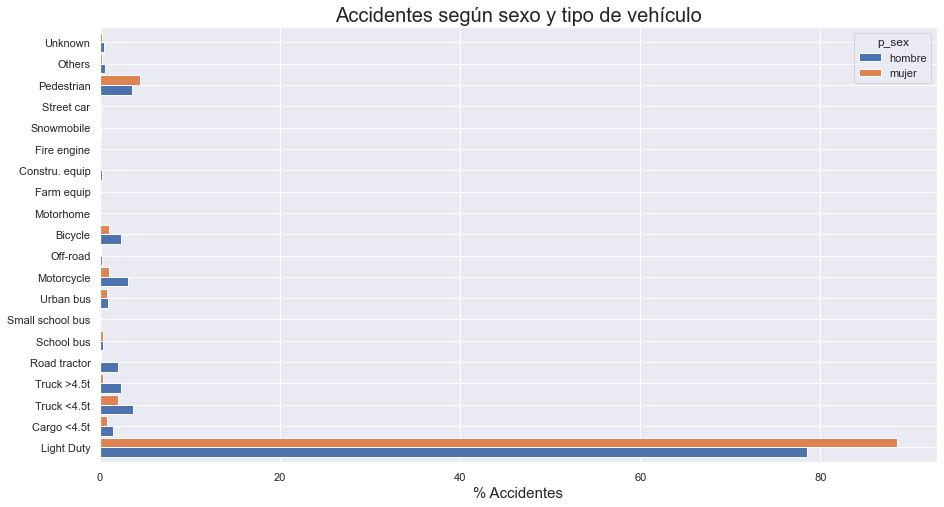

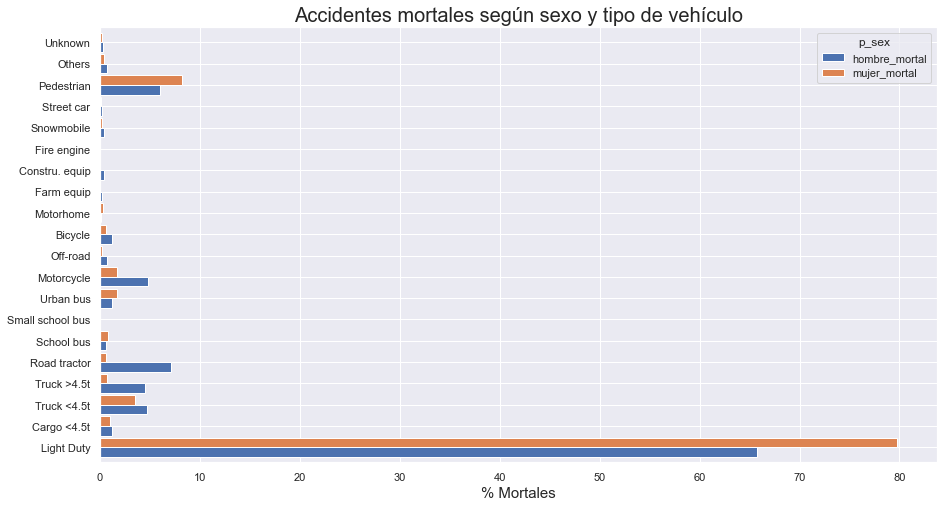

In [53]:
# Visualizamos los datos normalizados:
df_sex.plot.barh(width = 0.9, log= False)
plt.title('Accidentes según sexo y tipo de vehículo', fontsize = 20)
plt.ylabel('')
plt.xlabel('% Accidentes', fontsize = 15)
plt.show()

df_sex_mort.plot.barh(width = 0.9, log= False)
plt.title('Accidentes mortales según sexo y tipo de vehículo', fontsize = 20)
plt.ylabel('')
plt.xlabel('% Mortales', fontsize = 15)
plt.show()

In [54]:
# Como se distribuyen según el tipo de vehículo:
tipo = acc_mortal(df, 'v_type', 'acc_mortal')

In [55]:
tipo.reset_index()
tipo['tipo_vehiculo'] = tipo['v_type'].map({
        '01': 'Light Duty', '05': 'Cargo <4.5t', '06':'Truck <4.5t',
        '07': 'Truck >4.5t', '08': 'Road tractor', '09': 'School bus',
        '10' : 'Small school bus', '11': 'Urban bus', '14' : 'Motorcycle',
        '16' : 'Off-road', '17': 'Bicycle', '18': 'Motorhome', '19' : 'Farm equip',
        '20' : 'Constru. equip', '21': 'Fire engine', '22': 'Snowmobile',
        '23': 'Street car', 'NN' : 'Pedestrian', 'QQ': 'Others', 'UU':  'Unknown'})
tipo = tipo.set_index('tipo_vehiculo')
tipo = tipo.drop(['v_type'], axis = 1)
tipo.head()

,accidentes,acc_mortal,pct_mortales,acc_ponderado,muertes_ponderado
tipo_vehiculo,,,,,
Light Duty,4827390,68917,1.427624,82.372976,69.872152
Cargo <4.5t,66106,1103,1.668532,1.128011,1.118287
Truck <4.5t,175491,4248,2.420637,2.994520,4.306875
Truck >4.5t,88057,3273,3.716911,1.502575,3.318362
Road tractor,70556,5140,7.284993,1.203944,5.211238


## 7. Configuración del accidente:

1. El 30 % de los accidentes se producen de choque por detrás, y vemos que no son mortales casi en ningún caso, solo en el 0.3 % de los casos (total de 6,513).
2. La gran mortalidad se la llevan los choques frontales, donde se eleva al 11%. Suponen solamente el 3 % de los accidentes pero el 22 % de las muertes.
3. La siguiente categoría con mayor mortalidad son los choques desde la derecha, que suponen el 14 % de los accidentes y el 12 % de todas las muertes.
4. Por último de la tabla, destacamos los giros a la izquierda traspasando carril en dirección contraria: suponen el 7 % de los accidentes y el 4 % de las muertes.
5. Si miramos el gráfico, vemos en barras el porcentaje de accidentes y en línea roja el porcentaje de mortalidad, donde se ve de forma clara lo comentado en el punto anterior.

In [56]:
# En primer lugar echamos un vistazo rápido:
conf = acc_mortal(df, 'c_conf', 'acc_mortal')

In [57]:
# Cambiamos el nombre de las filas:
conf = conf.set_index('c_conf')
conf = conf.rename(index = {'01':'Hit a moving object', '02': 'Hit a stationary object',
        '03': 'Ran off left shoulder', '04' : 'Ran off Right shoulder','05':'Rollover on a Roadway',
        '06' : 'Other single vehicle collision', '21': 'Rear End collision','22': 'Side Swipe',
        '23': '1 vehicle passing to the left', '24': '1 vehicle passing to the right',
        '25':  '2 vehicle-same direction' , '31': 'Head-on collision',
        '32' : 'Approaching side-swipe','33' : 'Left turn opposing traffic',
        '34':' Right turn' ,'35': 'Right angle collision',
        '36' : 'Any other two-vehicle','41': 'Hit a parked motor vehicle', 'QQ': 'Not provided'
                            , 'UU': 'Unknown'})
conf


,accidentes,acc_mortal,pct_mortales,acc_ponderado,muertes_ponderado
c_conf,,,,,
Hit a moving object,92430,2917,3.155902,1.577195,2.957428
Hit a stationary object,186935,4605,2.463423,3.189797,4.668823
Ran off left shoulder,165410,6563,3.967717,2.822501,6.653960
Ran off Right shoulder,214350,7430,3.466293,3.657597,7.532976
Rollover on a Roadway,13049,325,2.490612,0.222664,0.329504
Other single vehicle collision,515468,13104,2.542156,8.795774,13.285614
Rear End collision,1771212,6513,0.367714,30.223372,6.603267
Side Swipe,197006,2636,1.338030,3.361645,2.672534
1 vehicle passing to the left,70088,1017,1.451033,1.195958,1.031095


In [58]:
conf = conf.reset_index()

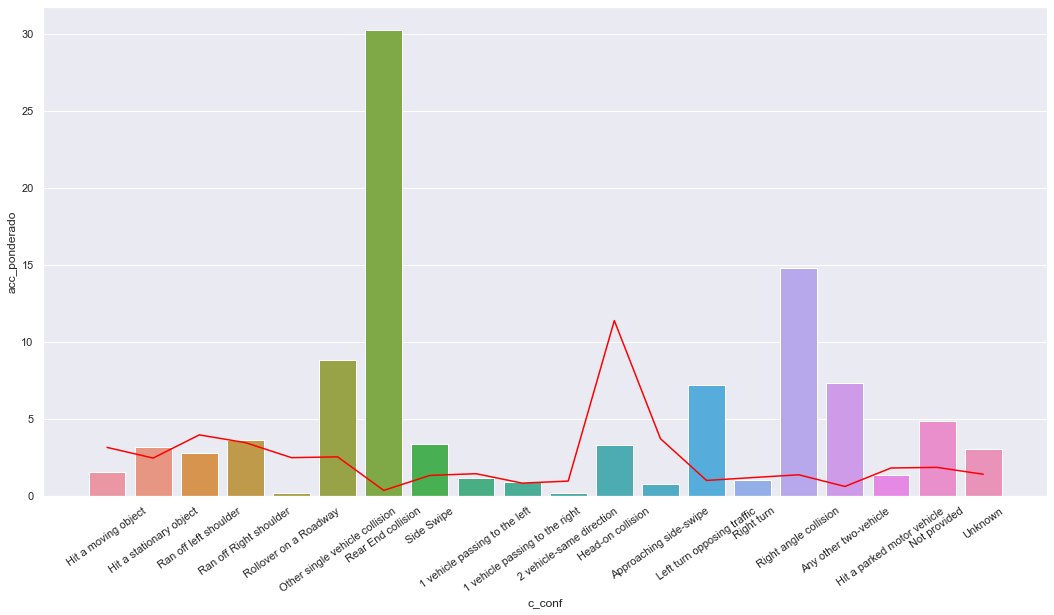

In [59]:
# Visualizamos con un barplot: rear-end se lleva la palma en cantidades
sns.set(rc={'figure.figsize':(18, 9)})
sns.barplot(x='c_conf', y= 'acc_ponderado',
            data = conf)
plt.xticks(rotation = 35)

sns.set(rc={'figure.figsize':(18, 9)})
sns.lineplot(x='c_conf', y= 'pct_mortales',
            data = conf, color='red')
plt.xticks(rotation = 35);

## 8. Condiciones climatológicas.

Temperatura media anual en Canadá:
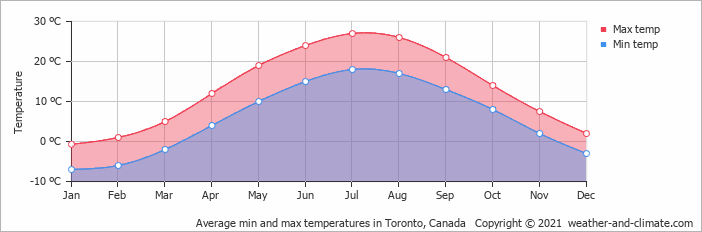

Horas medias anuales de luz en Canadá:

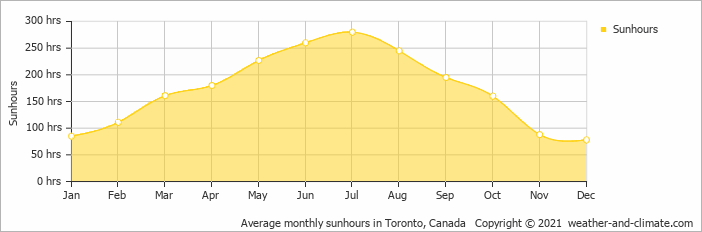

Precipitaciones medias en Canadá:

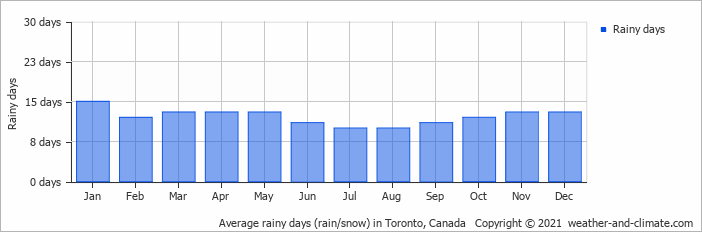


- Fuente: https://weather-and-climate.com/average-monthly-Rainfall-Temperature-Sunshine,toronto,Canada

### Conclusiones:
1. La gran cantidad de accidentes se dan cuando los días son claros y soleados, en un 70 %.
2. Las muertes, también se da cuando el clima es así, en un 65 %
3. La mortalidad sin embargo, es mucho más elevada en las siguientes situaciones: cuando está nublado, helada, nieve o niebla. Estos 4 factores juntos suponen el 22 % de los accidentes mortales.
4. La distribución de los accidentes tiene sentido mirando las gráficas del clima en Canadá. Nos encontramos con que los accidentes cuando el día es soleado siguen una sitribución idéntica a las horas de luz en Canadá a lo largo del año, con máximos en julio y agosto y disminuyendo en ambas direcciones opuestas.
5. Viendo las gráficas, nos encontramos con accidentes y fallecidos provocados por las nevadas en los meses fríos del año, entre noviembre y marzo.
6. Las precipitaciones mantienen una distribución constante durante todo el año, así como los accidentes provocados por ella. No vemos un patrón claro.
7. Lo mismo ocurre cuando el día está nublado

In [60]:
# Vistazo general:
tiempo = acc_mortal(df, 'c_wthr', 'acc_mortal')
tiempo['clima'] = tiempo['c_wthr'].map({ '1' : 'Clear and sunny','2': 'Overcast',
                                            '3': 'Raining', '4': 'Snowing',
                                            '5': 'Freezing rain, hail', '6': 'Fog, smog, mist',
                                            '7': 'Strong wind', 'Q': 'other', 'U': 'unknown'})

In [61]:
tiempo = tiempo.drop('c_wthr', axis = 1)
tiempo = tiempo.set_index('clima')
tiempo

,accidentes,acc_mortal,pct_mortales,acc_ponderado,muertes_ponderado
clima,,,,,
Clear and sunny,4074538,65074,1.597089,69.526560,65.975890
Overcast,600226,12520,2.085881,10.242057,12.693520
Raining,600105,8262,1.376759,10.239992,8.376507
Snowing,354615,6907,1.947746,6.051032,7.002727
"Freezing rain, hail",30330,810,2.670623,0.517541,0.821226
"Fog, smog, mist",82439,3447,4.181273,1.406712,3.494774
Strong wind,15164,580,3.824848,0.258753,0.588038
other,15013,250,1.665223,0.256177,0.253465
unknown,87975,783,0.890026,1.501176,0.793852


In [62]:
# Ahora, juntamos meses y clima, pues nos dirá cuando se dan más accidentes:
# Igual que antes, nos quitamos los meses desconocidos:
df['c_mnth'] = df['c_mnth'].replace({'01': '1', '02' : '2', 11: '11', 12: '12', 'UU': '8'}).astype(int)
df_clima = df[['c_mnth','c_wthr']].groupby(['c_wthr','c_mnth']).size().unstack()

In [63]:
df_clima = df_clima.reset_index()
df_clima['clima'] = df_clima['c_wthr'].map({ '1' : 'Clear and sunny','2': 'Overcast',
                                            '3': 'Raining', '4': 'Snowing',
                                            '5': 'Freezing rain, hail', '6': 'Fog, smog, mist',
                                            '7': 'Strong wind', 'Q': 'other', 'U': 'unknown'})
df_clima = df_clima.drop('c_wthr', axis = 1)
df_clima = df_clima.set_index('clima')
df_clima

c_mnth,1,2,3,4,5,6,7,8,9,10,11,12
clima,,,,,,,,,,,,
Clear and sunny,295579,265508,273090,277893,350112,403600,440233,444608,396638,341168,291646,294463
Overcast,58613,44557,43974,38066,47410,48976,43386,43233,42771,58137,62546,68557
Raining,28547,19369,28511,45076,58419,56817,43615,47942,60349,90590,74968,45902
Snowing,83158,62292,47217,18017,1914,179,115,173,669,10061,46828,83992
"Freezing rain, hail",5908,4461,3081,2814,621,243,242,210,287,1200,3917,7346
"Fog, smog, mist",14349,15666,11380,3018,2007,1933,2295,2684,3387,4967,8188,12565
Strong wind,2952,2775,2101,905,588,276,331,234,378,775,1618,2231
other,1797,1165,1101,959,990,1150,919,1024,1181,1503,1544,1680
unknown,8971,7494,7359,5785,6174,6836,6557,7322,7130,7510,7825,9012


Representaciones gráficas:

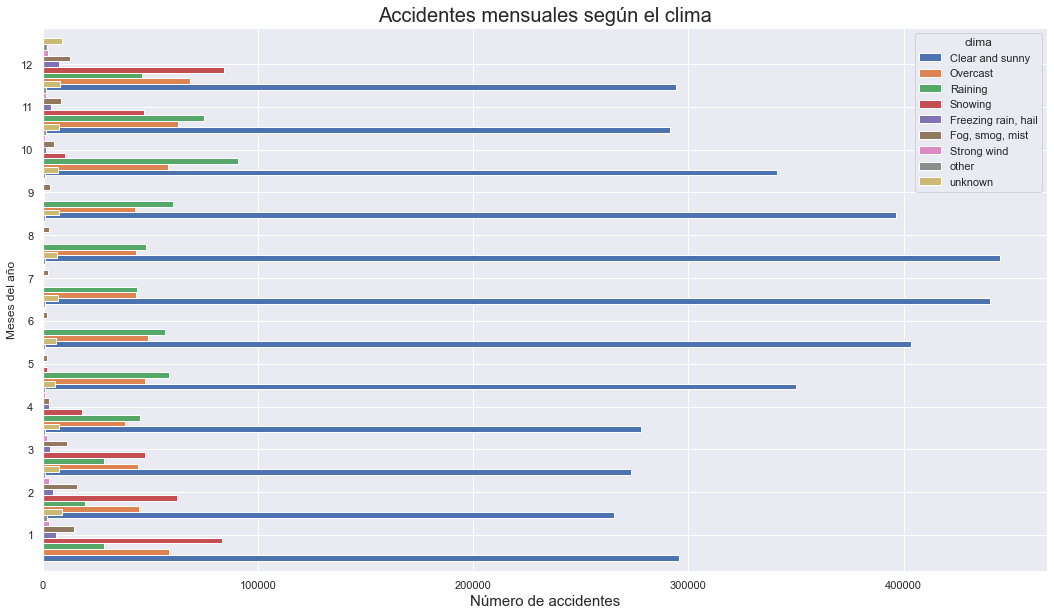

In [64]:
df_clima.T.plot.barh(width = 1.2, figsize = (18, 10))
plt.title('Accidentes mensuales según el clima', fontsize = 20)
plt.ylabel('Meses del año')
plt.xlabel('Número de accidentes', fontsize = 15)
plt.show()

In [65]:
df_clima_mort = df[df['acc_mortal']== 1]
df_clima_mort = df_clima_mort[['c_wthr', 'c_mnth', 'acc_mortal']]
# agrupamos por clima y contamos repeticiones: unstack para que nos saque df
df_clima_mort = df_clima_mort[['c_mnth','c_wthr']].groupby(['c_wthr','c_mnth']).size().unstack()
df_clima_mort = df_clima_mort.reset_index()
df_clima_mort['clima'] = df_clima_mort['c_wthr'].map({ '1' : 'Clear and sunny','2': 'Overcast',
                                            '3': 'Raining', '4': 'Snowing',
                                            '5': 'Freezing rain, hail', '6': 'Fog, smog, mist',
                                            '7': 'Strong wind', 'Q': 'other', 'U': 'unknown'})
df_clima_mort = df_clima_mort.drop('c_wthr', axis = 1)
df_clima_mort = df_clima_mort.set_index('clima')
df_clima_mort

c_mnth,1,2,3,4,5,6,7,8,9,10,11,12
clima,,,,,,,,,,,,
Clear and sunny,3734.0,3396.0,3748.0,4185.0,5603.0,6573.0,8491.0,8296.0,6695.0,5609.0,4387.0,4357.0
Overcast,1090.0,781.0,852.0,819.0,1045.0,1046.0,934.0,1058.0,976.0,1238.0,1255.0,1426.0
Raining,377.0,274.0,381.0,474.0,703.0,782.0,630.0,741.0,905.0,1297.0,1017.0,681.0
Snowing,1538.0,1074.0,853.0,388.0,45.0,4.0,NaN,5.0,8.0,282.0,1095.0,1615.0
"Freezing rain, hail",140.0,102.0,103.0,57.0,30.0,19.0,4.0,2.0,9.0,67.0,111.0,166.0
"Fog, smog, mist",474.0,557.0,438.0,151.0,115.0,90.0,111.0,162.0,389.0,203.0,288.0,469.0
Strong wind,107.0,96.0,82.0,31.0,47.0,12.0,18.0,11.0,16.0,37.0,40.0,83.0
other,30.0,27.0,12.0,8.0,22.0,10.0,10.0,23.0,21.0,33.0,25.0,29.0
unknown,37.0,48.0,49.0,72.0,72.0,88.0,71.0,114.0,60.0,56.0,68.0,48.0


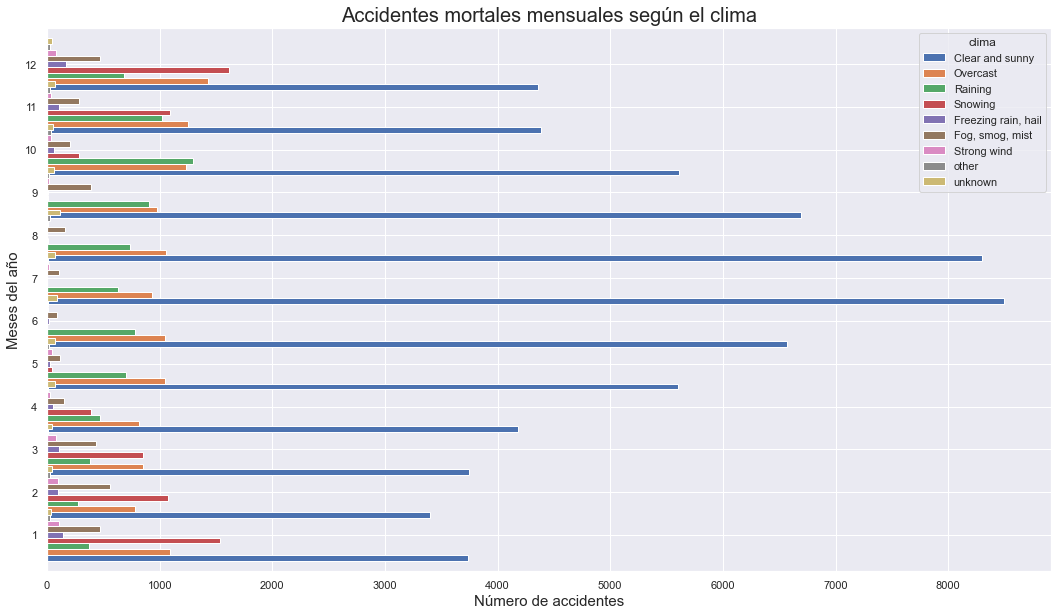

In [66]:
df_clima_mort.T.plot.barh(width = 1.2, figsize = (18, 10))
plt.title('Accidentes mortales mensuales según el clima', fontsize = 20)
plt.ylabel('Meses del año', fontsize = 15)
plt.xlabel('Número de accidentes', fontsize = 15)
plt.show()

# 9. Medidas de seguridad utilizadas:

### Conclusiones

1. Vemos que el 71 % de personas que sufren accidentes, utilizan medidas de seguridad. 
2. No obstante, un 4 % de los accidentados no usaron medidas de seguridad. Y sin embargo, suponen el 16 % de implicados en accidentes mortales, esto no debería ser llamativo.
3. De la tabla df_seg nos llama la atención la gran cantidad de valores desconocidos. 
4. Observando la gráfica de abajo, podemos ver cómo la mortalidad se dispara cuando no se usaron las medidas de seguridad apropiadas. Nos hemos encontrado con otro pico en "con casco", por lo que hemos pasado a estudiar la mortalidad de accidentes con moto por separado en el último punto de este apartado.

In [67]:
# Rápidamente se ve cómo crece la mortalidad cuando no se toman medidas de seguridad
df_seg = df.groupby(['p_safe','acc_mortal']).size().unstack().fillna(0)
acc_mortal(df, 'p_safe', 'acc_mortal')

,p_safe,accidentes,acc_mortal,pct_mortales,acc_ponderado,muertes_ponderado
0,01,198606,16113,8.113048,3.388947,16.336317
1,02,4163903,53219,1.278104,71.051455,53.956587
2,09,96437,2913,3.020625,1.645569,2.953373
3,10,112,1,0.892857,0.001911,0.001014
4,11,11,0,0.000000,0.000188,0.000000
5,12,18322,633,3.454863,0.312641,0.641773
6,13,148730,4114,2.766086,2.537879,4.171018
7,NN,571946,8211,1.435625,9.759496,8.324800
8,QQ,47150,1306,2.769883,0.804552,1.324100
9,UU,615188,12123,1.970617,10.497363,12.291018


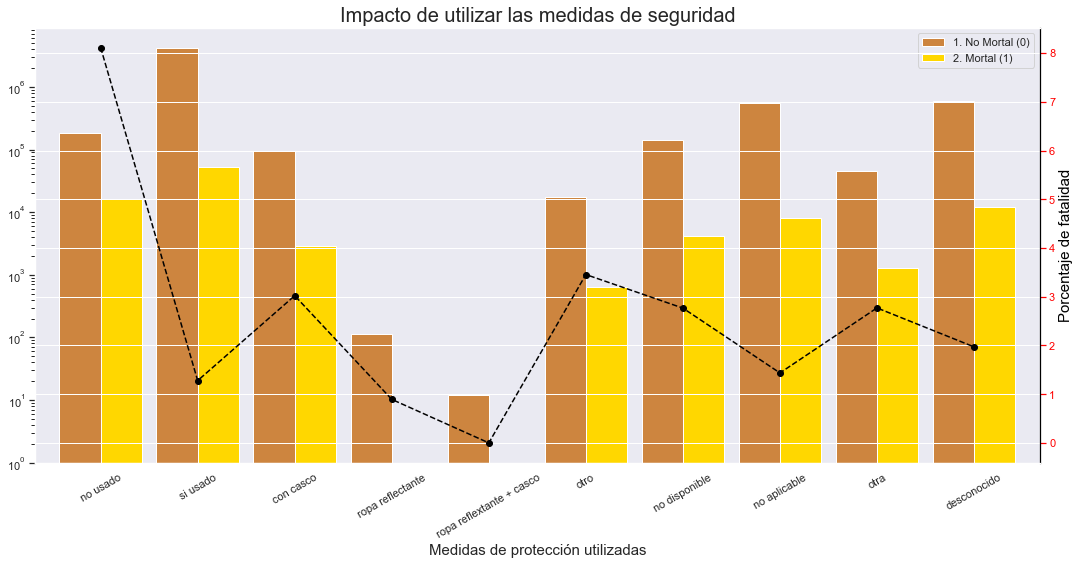

In [68]:
# Visualizamos:
prot = ['no usado', 'si usado', 'con casco', 'ropa reflectante', 'ropa reflextante + casco',
        'otro', 'no disponible', 'no aplicable', 'otra', 'desconocido']

# Definimos nuestro gráfico
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.set_ylabel('Porcentaje de fatalidad', fontsize = 15)
ax2.spines['right'].set_color('black')
ax2.yaxis.label.set_color('black')
ax2.tick_params(axis='y',colors='red')

# Dibujamos el gráfico en logaritmos:
df_seg.plot(kind='bar', rot=30, log=True, 
            color=['peru','gold'], figsize=(18,8), width = 0.85, ax=ax1)
plt.title('Impacto de utilizar las medidas de seguridad', fontsize = 20)
ax1.grid(axis='both')
ax1.legend(['1. No Mortal (0)','2. Mortal (1)'])
ax1.set_xticklabels(prot)
ax1.set_xlabel('Medidas de protección utilizadas', fontsize = 15)

# Porcentajes fatalidad
se1 = df_seg[1] / (df_seg[0] + df_seg[1]) * 100
se1.plot(c='black', style='o--', ax=ax2)
plt.xticks(np.arange(0,10), prot); 

## 10. Número total de fallecidos en el período, sexo y períodos vacacionales.

La variable P_isev nos dice si esa persona murió o no en el período posterior al accidente. Esta variable la hemos descartado en nuestro modelo, puesto que es un dato que se desconoce a la hora del accidente. No obstante, queríamos dar una pincelada para analizar el total de fallecidos.

1. El valor 3 es que la persona falleció, entonces nos encontramos con un total de 40,354 fallecidos en Canadá entre 1999 y 2014. 

2. Existe una correlación perfecta viendo la representación de las series en escala logarítmica. Esto resulta evidente, puesto que no puede existir accidentes mortales si no hay primero accidentes. 

3. Del total de fallecidos, los hombres suponen más que el doble que las mujeres (27k vs 12k)

4. Por último, hemos analizado el componente mensual. Vemos claramente patrones en los meses de verano y Navidad. Julio, agosto, septiembre y diciembre son los meses con más mortalidad, coincidiendo con los períodos típicos de vacaciones. Sin embargo, en números absolutos de accidentes vemos durante el año un comportamiento parecido. Agosto sigue siendo el líder, pero las diferencias son menos que cuando hablábamos de accidentes mortales. El mes que representa menos accidentes así como menos fallecidos es abril.

In [69]:
data['fallecidos'] = data['p_isev'] == '3'
data["fallecidos"] = data["fallecidos"].astype(int)

In [70]:
data['fallecidos'].sum()

40354

In [71]:
anuales = data[['c_year', 'fallecidos', 'p_sex']].groupby('c_year').sum('fallecidos')

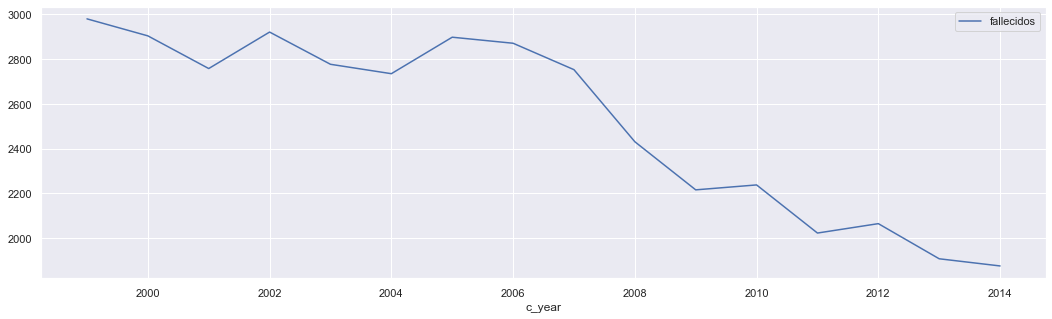

In [72]:
anuales.plot(figsize = (18, 5));

In [73]:
# Han muerto más hombres o mujeres ? 
data[['fallecidos', 'p_sex']].groupby('p_sex').sum('fallecidos')

,fallecidos
p_sex,
F,12410
M,27867
N,0
U,77


Comprobamos que la tendencia se comporta exactamente igual que la de accidentes en el primer apartado de este trabajo. Por lo tanto, es evidente que existe una correlación positiva entre a mayor número de accidentes mayor fallecimientos, vamos a comprobarlo:

In [74]:
from sktime.utils.plotting import plot_series

In [83]:
# creamos timeseries con mortales y no mortales
data_sev = data[:]
data_sev['mortal']= data["acc_mortal"]== 1
data_sev['no_mortal']= data["acc_mortal"]!= 1
# Creamos un formato fecha 
data_sev['c_mnth'] = data_sev['c_mnth'].replace(['UU'], "8")
data_sev['date']= data_sev['c_year'].astype(str) + '-' + data_sev['c_mnth'].astype(str)

In [84]:
data_sev['date']= pd.PeriodIndex(data_sev['c_year'].map(str) + '-' + data_sev['c_mnth'].astype(str),
                                 freq= 'M')

In [85]:
sev = data_sev.groupby('date')['mortal','no_mortal'].sum()
sev_log = np.log(sev).diff().dropna()

Text(0.5, 0, 'fechas')

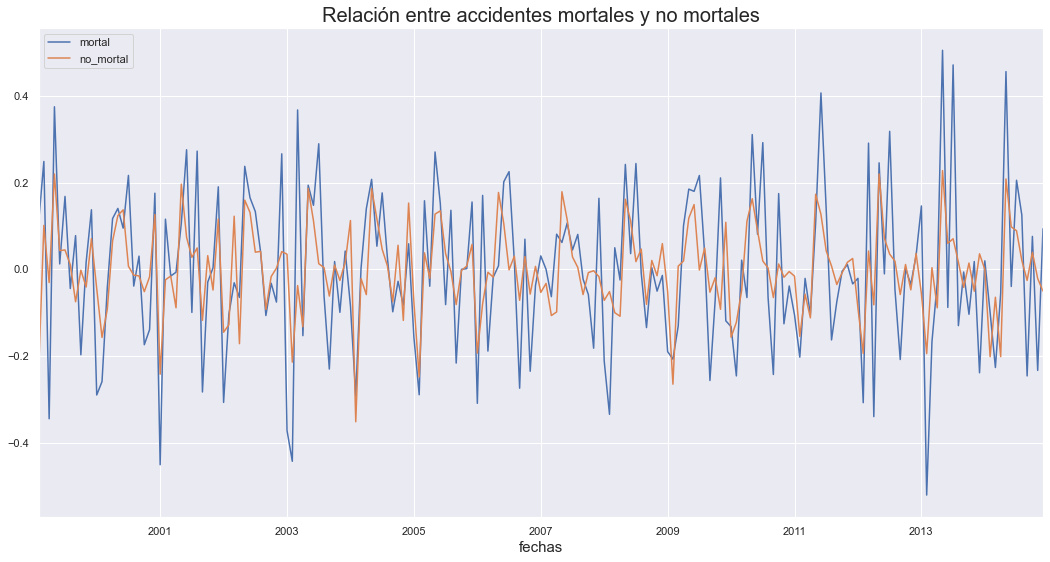

In [86]:
sev_log.plot()
plt.title('Relación entre accidentes mortales y no mortales', fontsize = 20)
plt.xlabel('fechas', fontsize = 15)

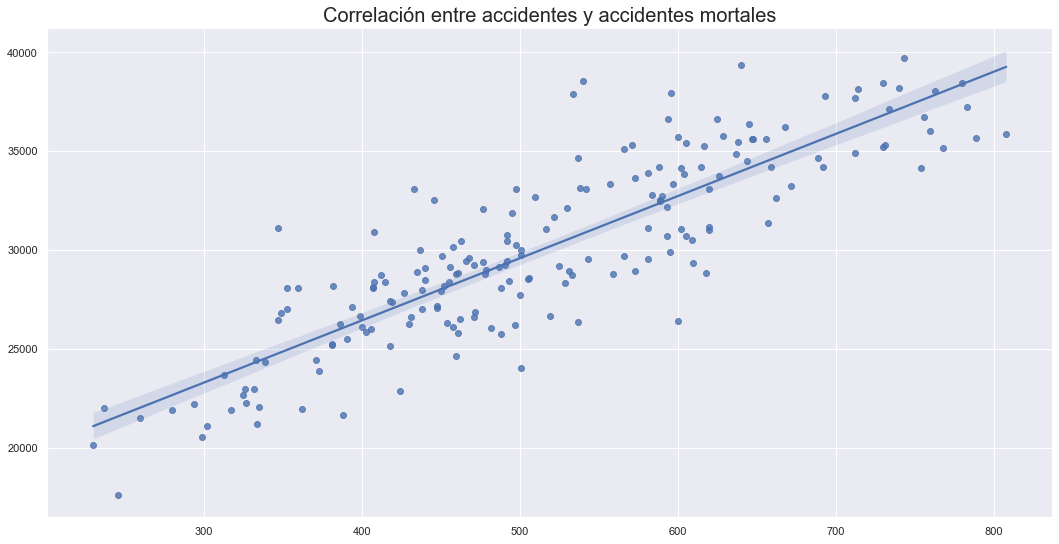

In [87]:
sns.regplot('mortal', 'no_mortal', data=sev)
plt.title('Correlación entre accidentes y accidentes mortales', fontsize = 20)
plt.ylabel('')
plt.xlabel('');

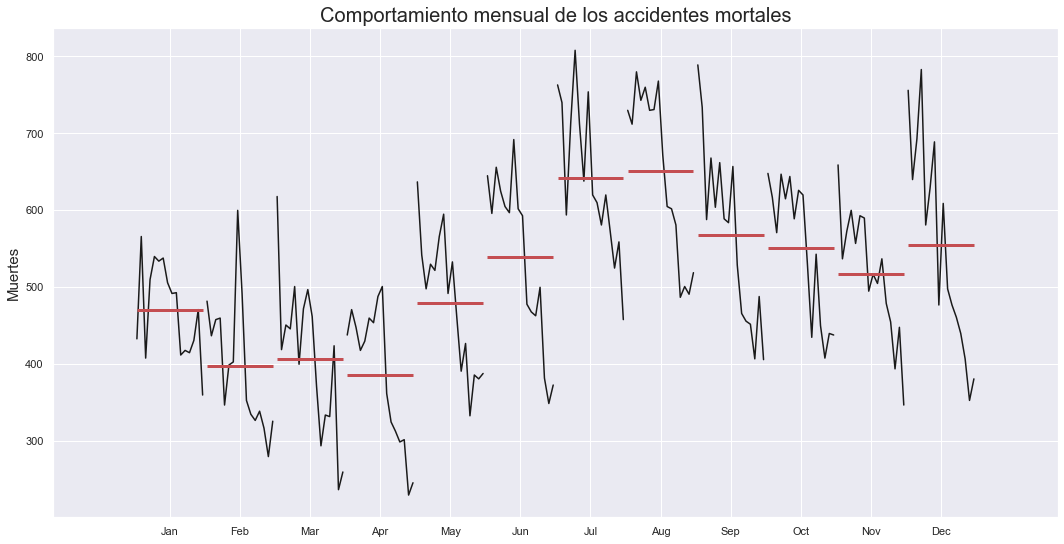

In [88]:
# Comportamiento mensual de las muertes
import matplotlib.pyplot as plt
import statsmodels.api as sm

ax = plt.gca() 
sm.graphics.tsa.month_plot(sev['mortal'], ax = ax)
ax.set_title('Comportamiento mensual de los accidentes mortales', fontsize = 20)
ax.set_ylabel('Muertes', fontsize = 15);

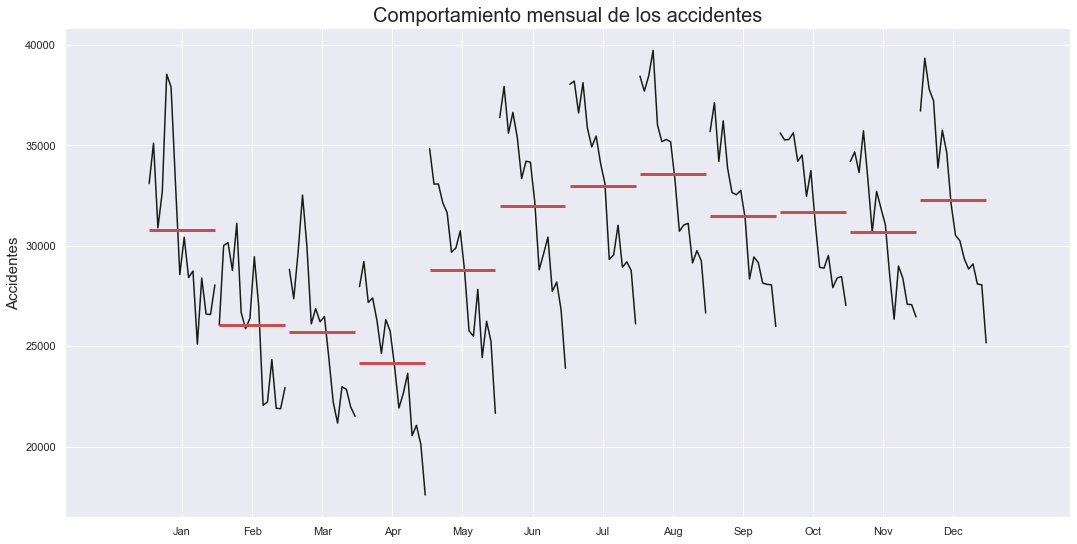

In [89]:
# Accidentes
ax = plt.gca() 
sm.graphics.tsa.month_plot(sev['no_mortal'], ax = ax)
ax.set_title('Comportamiento mensual de los accidentes', fontsize = 20)
ax.set_ylabel('Accidentes', fontsize = 15);